# Лабораторна робота № 2

## Тема: Синтез нерекурсивного цифрового фільтра.

## Мета: навчитися проводити аналіз та синтез нерекурсивного цифрового фільтра.

*Зробив: Савченко Андрій*

*Виконав: 01.10.2024*

## ВАРІАНТ ЗАВДАНЬ 22

### Умовні позначення:
### ФВЧ – фільтр верхніх частот.

<img src="Laba2_22.png">

У завданнях коефіцієнт дорівнюватиме 1

## Порядок виконання лабораторної роботи № 2

### 1.Побудувати графік заданого аналогового вхідного сигналу x(t).

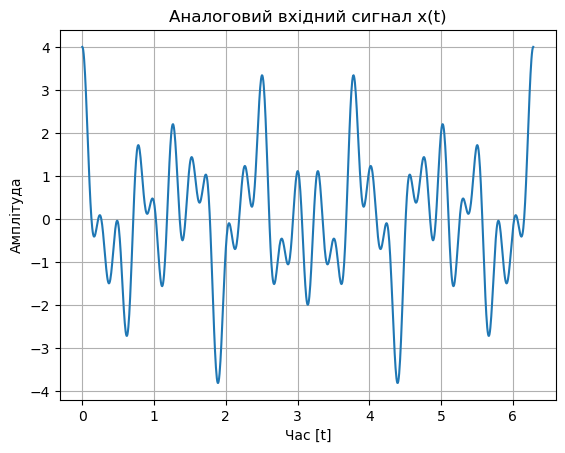

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Вектор часу
t = np.linspace(0, 2 * np.pi, 1000)

# Визначення вхідного сигналу x(t)
def x(t):
    return np.cos(25 * t) + np.cos(5 * t) + np.cos(8 * t) + np.cos(15 * t)

# Побудування аналогового сигналу
plt.plot(t, x(t))
plt.title("Аналоговий вхідний сигнал x(t)")
plt.xlabel("Час [t]")
plt.ylabel("Амплітуда")
plt.grid(True)
plt.show()

### 2.Згідно з індивідуальним завданням розрахувати граничні частоти (f_α,ω_α), частоти дискретизації (f_α,ω_α) аналогового сигналу x(t), часові інтервали (T_α,T_g) фільтра (див. допоміжний файл FIR_filters.mcd).

In [2]:
# Задані параметри
omega_g = 20  # рад/сек (частота зрізу)
f_g = omega_g / (2 * np.pi)  # частота зрізу в Гц
f_a = 4 * f_g  # Частота Найквіста для аналогового сигналу
T_a = 1 / f_a  # Інтервал часу Найквіста

print(f"Частота зрізу (f_g): {f_g} Гц")
print(f"Частота Найквіста (f_a): {f_a} Гц")
print(f"Інтервал часу Найквіста (T_a): {T_a} секунд")

Частота зрізу (f_g): 3.183098861837907 Гц
Частота Найквіста (f_a): 12.732395447351628 Гц
Інтервал часу Найквіста (T_a): 0.07853981633974483 секунд


### 3.Побудувати графік бажаної передаточної функції ідеального фільтра, що відповідає індивідуальному завданню.

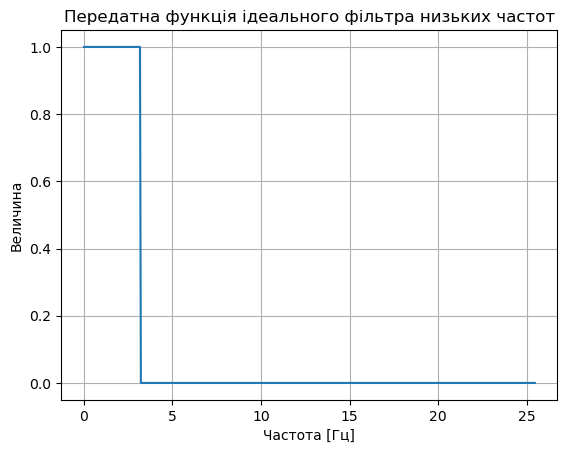

In [3]:
# Діапазон частот
frequencies = np.linspace(0, 2 * f_a, 500)

# Ідеальна відповідь фільтра
ideal_filter = np.where(frequencies <= f_g, 1, 0)

# Побудування ідеальної функції передачі фільтра
plt.plot(frequencies, ideal_filter)
plt.title("Передатна функція ідеального фільтра низьких частот")
plt.xlabel("Частота [Гц]")
plt.ylabel("Величина")
plt.grid(True)
plt.show()

### 4.Розрахувати коефіцієнти реального фільтра.

In [4]:
from scipy.signal import firwin

# Порядок фільтрів
N = 6

# Коефіцієнти FIR-фільтра з використанням вікна Хеммінга
real_filter_coeffs = firwin(numtaps=N+1, cutoff=f_g, fs=f_a, window="hamming")

print("Реальні коефіцієнти фільтра:", real_filter_coeffs)

Реальні коефіцієнти фільтра: [-8.72182811e-03  6.20842359e-18  2.51842787e-01  5.13758083e-01
  2.51842787e-01  6.20842359e-18 -8.72182811e-03]


### 5.Побудувати на одній площині графіки апроксимуючої передаточної функції реального фільтра; апроксимуючої передаточної функції реального фільтра, згладженої вікном фон Ганна та функцією Ланчоса; передаточної функції ідеального фільтра.

C:\Users\Admin\AppData\Local\Temp\ipykernel_1604\354374962.py:7: DeprecationWarning: Importing hann from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.hann' or the convenience function 'scipy.signal.get_window' instead.
  hann_window = hann(N + 1)


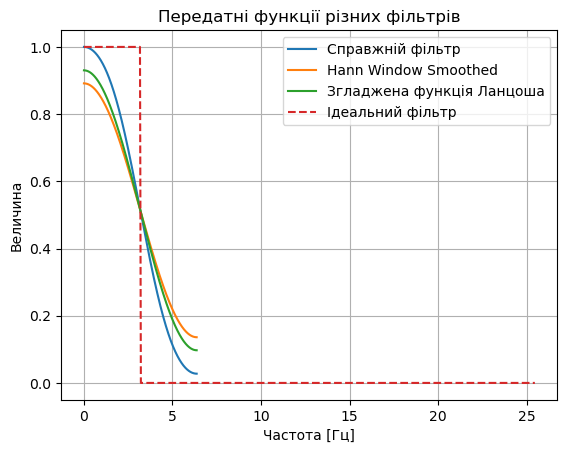

In [5]:
from scipy.signal import freqz, hann

# Розрахування АЧХ реального фільтра
w, h = freqz(real_filter_coeffs, worN=8000)

# Згладжування вікон Hann
hann_window = hann(N + 1)
real_filter_hann = real_filter_coeffs * hann_window
w_hann, h_hann = freqz(real_filter_hann, worN=8000)

# Згладжування функції Ланцоша
lanczos_window = np.sinc(np.linspace(-1, 1, N + 1))
real_filter_lanczos = real_filter_coeffs * lanczos_window
w_lanczos, h_lanczos = freqz(real_filter_lanczos, worN=8000)

# Побудування графіку передатних функцій
plt.plot(w * f_a / (2 * np.pi), abs(h), label="Справжній фільтр")
plt.plot(w_hann * f_a / (2 * np.pi), abs(h_hann), label="Hann Window Smoothed")
plt.plot(w_lanczos * f_a / (2 * np.pi), abs(h_lanczos), label="Згладжена функція Ланцоша")
plt.plot(frequencies, ideal_filter, label="Ідеальний фільтр", linestyle="--")

plt.title("Передатні функції різних фільтрів")
plt.xlabel("Частота [Гц]")
plt.ylabel("Величина")
plt.legend()
plt.grid(True)
plt.show()

### 6.Обчислити вихідні дискретні послідовності фільтрів для кожної розрахованої в п. 5 апроксимуючої передаточної функції.

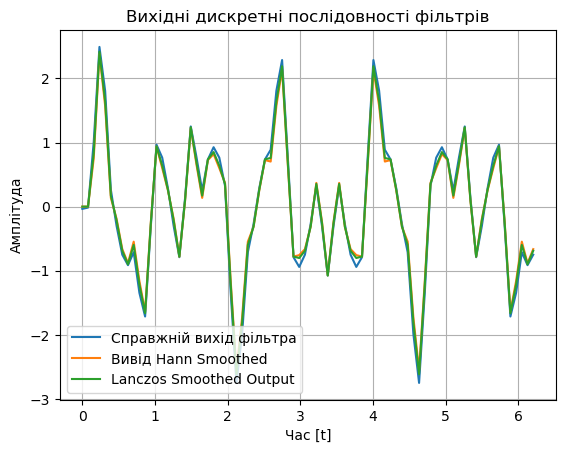

In [6]:
from scipy.signal import lfilter

# Вибірка вхідного сигналу
t_samples = np.arange(0, 2 * np.pi, T_a)
x_samples = x(t_samples)

# Застосування справжнього фільтру до дискретизованого вхідного сигналу
y_real = lfilter(real_filter_coeffs, 1, x_samples)

# Застосування згладженого фільтра Ганна
y_hann = lfilter(real_filter_hann, 1, x_samples)

# Застосування згладженого фільтра Ланцоша
y_lanczos = lfilter(real_filter_lanczos, 1, x_samples)

# Накреслення вихідних послідовностей
plt.plot(t_samples, y_real, label="Справжній вихід фільтра")
plt.plot(t_samples, y_hann, label="Вивід Hann Smoothed")
plt.plot(t_samples, y_lanczos, label="Lanczos Smoothed Output")
plt.title("Вихідні дискретні послідовності фільтрів")
plt.xlabel("Час [t]")
plt.ylabel("Амплітуда")
plt.legend()
plt.grid(True)
plt.show()

### 7.Відновити аналоговий фільтрований сигнал із дискретних послідовностей, отриманих у п. 6, за допомогою ряду Котельникова.

In [7]:
# Визначення реконструкції ряду Котельникова
def kotelnikov_series(y_n, T_a, t):
    restored_signal = np.zeros_like(t)
    for n in range(len(y_n)):
        restored_signal += y_n[n] * np.sinc((t - n * T_a) / T_a)
    return restored_signal

# Відновлення аналогових сигналів
y_real_restored = kotelnikov_series(y_real, T_a, t)
y_hann_restored = kotelnikov_series(y_hann, T_a, t)
y_lanczos_restored = kotelnikov_series(y_lanczos, T_a, t)

### 8.Побудувати на одній площині графіки аналогового вхідного сигналу x(t) та відновлених аналогових фільтрованих сигналів, отриманих у п. 7.

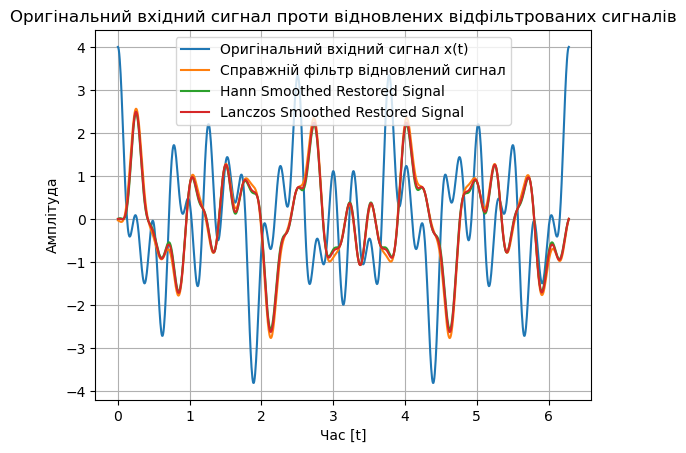

In [8]:
# Побудовання оригінального сигналу та відновлених сигналів
plt.plot(t, x(t), label="Оригінальний вхідний сигнал x(t)")
plt.plot(t, y_real_restored, label="Справжній фільтр відновлений сигнал")
plt.plot(t, y_hann_restored, label="Hann Smoothed Restored Signal")
plt.plot(t, y_lanczos_restored, label="Lanczos Smoothed Restored Signal")
plt.title("Оригінальний вхідний сигнал проти відновлених відфільтрованих сигналів")
plt.xlabel("Час [t]")
plt.ylabel("Амплітуда")
plt.legend()
plt.grid(True)
plt.show()

### 9.Пояснити отримані результати, зробити висновки.

Пояснення результатів:
Вхідний сигнал 𝑥(𝑡) складається з кількох гармонік різних частот:  cos(25𝑡), cos(5𝑡), cos(8𝑡), cos(15𝑡). Його спектр охоплює частоти до 25 рад/сек.

Висновки:
На графіку видно, що вхідний сигнал чітко відрізняється від фільтрованих сигналів. Це пов'язано з тим, що реальний фільтр і згладжені фільтри пропускають лише високі частоти, обмежуючи низькочастотні компоненти.

Реальний фільтр має чітке обмеження на граничній частоті 20 рад/сек, через що низькочастотні компоненти сигналу пригнічені. Фільтрований сигнал менш гладкий, оскільки немає згладжування вікнами.

Згладжені фільтри фон Ганна та Ланчоса пропонують дещо інші результати, оскільки їхні віконні функції надають плавніший перехід між пропусканням і пригніченням частот. Це помітно на графіку — ці сигнали більш гладкі, порівняно з сигналом, отриманим реальним фільтром.